In [1]:
# import functions and packages
from functions_book_chapter_SCA import *

dir_planet_ext = './data/GIS/extent/CATE_20180528_181110_img_ext.shp'
with fiona.open(dir_planet_ext, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
dir_aso = "./data/ASO/ASO_3M_SD_USCATE_20180528_binary.tif"
with rasterio.open(dir_aso,'r') as src:
    r_aso = rasterio.mask.mask(src, shapes, crop=True)
    
dir_pred = './data/SCA/20180528_181110_1025_3B_AnalyticMS_SR_clip_SCA.tif'
with rasterio.open(dir_pred,'r') as src:
    r_predict = rasterio.mask.mask(src, shapes, crop=True)

dir_watermask = './data/mask/waterbody_TB_UTM11.tif'
with rasterio.open(dir_watermask,'r') as src:
    r_watermask = rasterio.mask.mask(src, shapes, crop=True)
    
dir_glaciermask = './data/mask/02_rgi60_WesternCanadaUS_hypso_TB.tif'
with rasterio.open(dir_glaciermask,'r') as src:
    r_glaciermask = rasterio.mask.mask(src, shapes, crop=True)

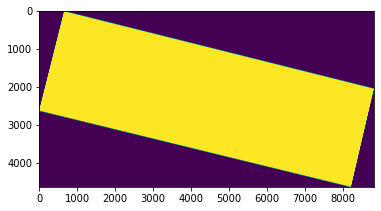

In [18]:
# import functions and packages
from functions_book_chapter_SCA import *

dir_inshp = './data/GIS/extent/CATE_20180528_181110_img_ext.shp'

dir_in_img = ['./data/ASO/ASO_3M_CHM_USCATB_20140827_clip_binary.tif',
             './data/mask/waterbody_TB_UTM11.tif',
             './data/mask/02_rgi60_WesternCanadaUS_hypso_TB.tif',
             './data/ASO/ASO_3M_SD_USCATE_20180528.tif']

dir_out_img = ['./data/ASO/ASO_3M_CHM_USCATB_20140827_binary_clip.tif',
             './data/mask/waterbody_TB_UTM11_clip.tif',
             './data/mask/02_rgi60_WesternCanadaUS_hypso_TB_clip.tif',
             './data/ASO/ASO_3M_SD_USCATE_20180528_clip.tif']

def clip_raster_shp_1D(dir_inshp, dir_in_img, dir_out_img):
    with fiona.open(dir_inshp, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(dir_in_img,'r') as src:
        out_img, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    # Save clipped imagery
    out_meta.update({"driver": "GTiff",
                     "height": out_img.shape[1],
                     "width": out_img.shape[2],
                     "transform": out_transform})

    with rasterio.open(dir_out_img, "w", **out_meta) as dest:
        dest.write(out_img)
    return out_img


    
# out_img = clip_raster_shp_1D(dir_inshp,dir_in_img[3], dir_out_img[3])
plt.imshow(out_img.squeeze())
plt.show()

In [16]:
dir_in_img[(len(dir_in_img)-1)]

'./data/ASO/ASO_3M_SD_USCATE_20180528.tif'

In [ ]:
plot

In [2]:
# Read Shape file
with fiona.open("input_data/shape_files/lidar_shape.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

# read imagery file
with rasterio.open("output_data/imagery_trans.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

# Save clipped imagery
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("output_data/imagery_trans_clip.tif", "w", **out_meta) as dest:
    dest.write(out_image)


(array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16),
 Affine(3.0, 0.0, 264777.0,
        0.0, -3.0, 4224306.0))

In [ ]:
with rasterio.open(
                dir_out, "w",
                driver = "GTiff",
                transform = raster.transform,
                dtype = rasterio.uint8,
                count = 1,
                width = raster.width,
                height = raster.height) as dst:
            dst.write(rasterized, indexes = 1)